# Hence Screening Project
## Project Category 2: Option 1
### Answering A Question With Data

#### Problem Scope: 

In this project, I will be analysing airbnb data for New York City in 2019 and aswering a question that can be used by the apprioprate stakeholders for decision msking,
The source of the data is from kaggle and can be found here https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Context: Airbnb is a house rental platform, where landlords or house owners put up their houses for lease and customers or clients can book them directly from the platform currently operating in over 100,000 cities and 220 countries worldwide.

The main question I will be trying to answer in this process is:

#### What are the top 3 neighborhoods that are able to host people for longer period of time and the top three neighborhood by room types  that these people use while in this location? 


This question is mainly for people who probably want places where they can lodge for a very long time and they dont want a situation where they may eventually be disturbed during their stay hence are looking for locations that have a track record of keeping people in for longer period of time and also one may have their prefernces as to what kind of room they would love to lodge in hence I believe this would help in making better decsions

By the end of this project, I expect to group the dataset by the different neighboorhood categories and by their room type  that have been able to lodge more people over time

Also, just to add on, I will also just add the average prices in these different locations such that people have a broader perspective when trying to eventually come up with their final decision




In [32]:
#importing the different libraries that will be used to explore the data and answer the questions needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
#Loading the dataset

df = pd.read_csv('AB_NYC_2019.csv')

In [34]:
# Viewing the top portion of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [62]:
# Looking at the different columns in the dataset just to have an idea about what I am working with
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
# Getting the shape of the data
df.shape

(48895, 16)

Dataframe currently has 48895 rows and 16 columns

In [36]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [37]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [63]:
# Here I am using correlation on the entire dataset across all the different columns
# This is basically to help me see if there is any relationship between the different variables I will be looking at 
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


In [39]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Dealing With Missing Values

From the cell above, we realize that some columns have missing data, for example, the name has 16 missing values, hostname has 21 missing vlaues , last review and reviews_per_month have 10052 missing values so in the cells below we are going to be dealing with the missing values in the different columns

Since the question we are trying to answer in this project will mainly be focusing on the neighborhood, neighborhood group and the minimum number of nights, then i think that most of the other columns are not really necessary so here we will just be deleting the columns from our dataset


In [40]:
# Deleting the other columns that are not needed for the exploration

del df['name']
del df['last_review']
del df['reviews_per_month']
del df['host_name']

In [64]:
# Inorder to confirm if we have been able to properly deal with the neighborhoods, I will be loading the dataframe again
# But then this time around loading only the rows that have missing value
df[df.isnull().any(axis=1)]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


In [65]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Right now we can see that there are no more null values in our dataset hence we are set to start off with analysis and answering the question

Firstly, we will start by grouping the data into its different neighborhoods, 
Secondly we will group it by the different category of houses that are in these neighborhoods
The rational behind this is that since we want to get a general sense of how each category is doing in regards to the number of minimum nights spent we need to get an average and one of the ways to approach it, is by grouping the dataframe

In [75]:
neighborhood_df = df.groupby(['neighbourhood_group'])['minimum_nights'].mean()

In [77]:
neighborhood_df

neighbourhood_group
Bronx            4.560953
Brooklyn         6.056556
Manhattan        8.579151
Queens           5.181433
Staten Island    4.831099
Name: minimum_nights, dtype: float64

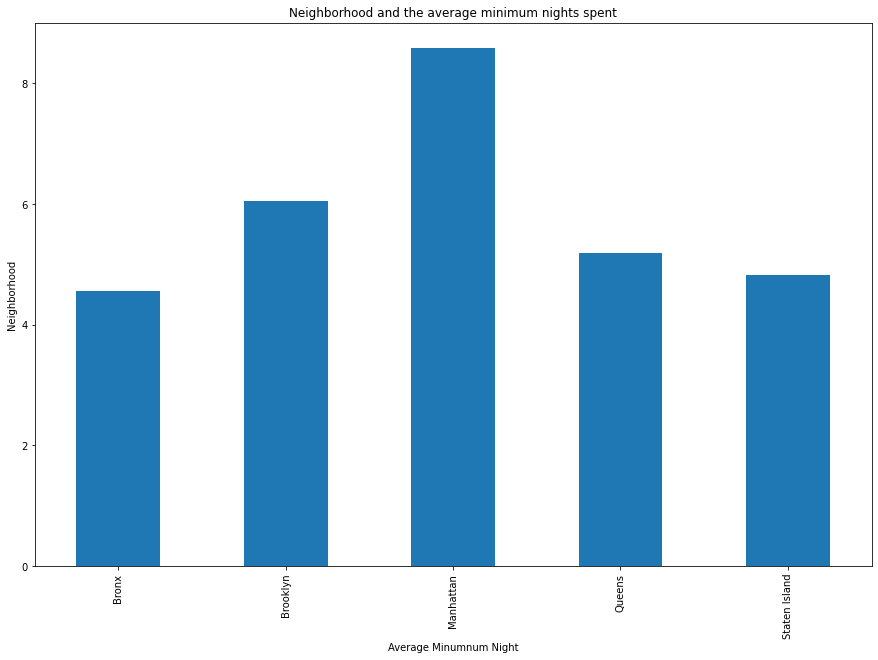

In [76]:
neighborhood_df.plot(kind='bar', figsize=(15,10))
plt.title('Neighborhood and the average minimum nights spent')
plt.xlabel('Average Minumnum Night')
plt.ylabel('Neighborhood')
plt.savefig('neighborhood.png')
plt.show()

In [66]:
grouped_df = df.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].mean()

In [67]:
grouped_df

neighbourhood_group  room_type      
Bronx                Entire home/apt     5.957784
                     Private room        3.858896
                     Shared room         3.366667
Brooklyn             Entire home/apt     6.531332
                     Private room        5.539479
                     Shared room         7.753027
Manhattan            Entire home/apt    10.539283
                     Private room        5.446880
                     Shared room         6.766667
Queens               Entire home/apt     5.369752
                     Private room        5.120107
                     Shared room         4.232323
Staten Island        Entire home/apt     6.238636
                     Private room        3.632979
                     Shared room         2.333333
Name: minimum_nights, dtype: float64

The rationale behind using a bar chart in order to display this is mainly because, it works well with displaying categorical data and we will be able to easily see disparities among the different neighborhoods as shown below

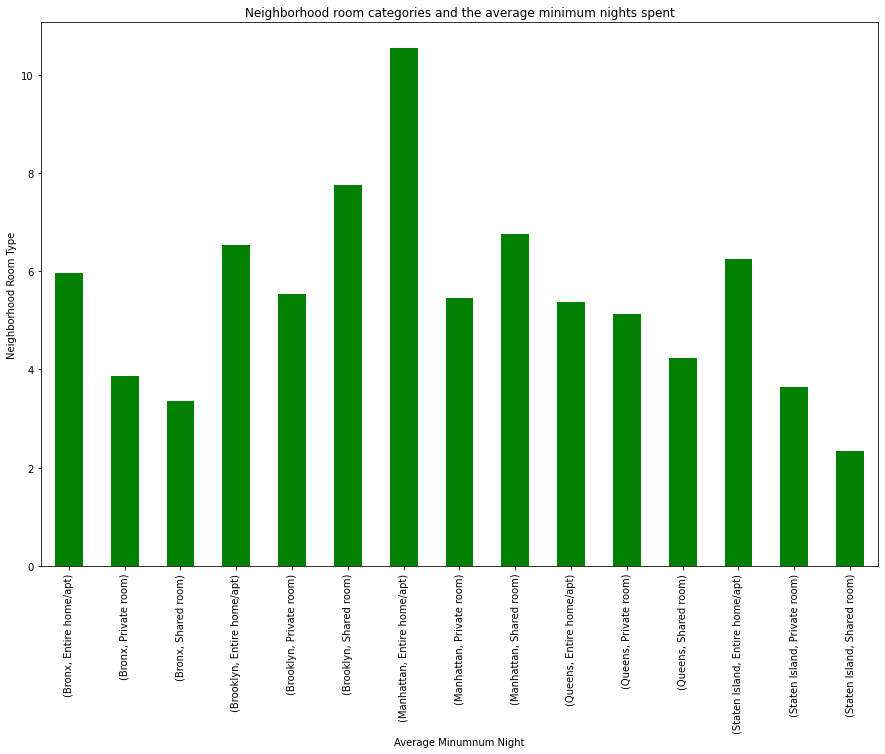

In [78]:
grouped_df.plot(kind='bar', figsize=(15,10), color='g')
plt.title('Neighborhood room categories and the average minimum nights spent')
plt.xlabel('Average Minumnum Night')
plt.ylabel('Neighborhood Room Type')
plt.savefig('bar1.png')
plt.show()

In [51]:
price_df = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

In [52]:
price_df

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

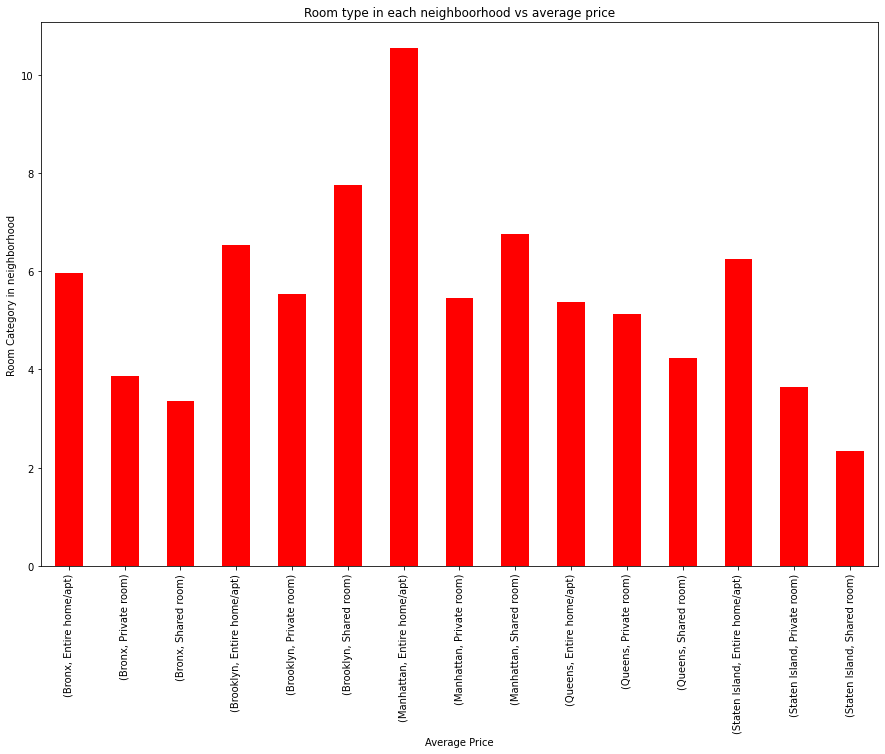

In [74]:
grouped_df.plot(kind='bar', figsize=(15,10), color='r')

plt.title('Room type in each neighboorhood vs average price')
plt.xlabel("Average Price")
plt.ylabel('Room Category in neighborhood')
plt.savefig('bar2.png')
plt.show()

## Recommendation

Based on the two graphs above, we can see that The neighborhood that has the highest average number of nights spent is _Manhattan_  and the room type is Entire home/apt with an average of 10.539283 minimum nights spent and _state island_ is the neighboorhood with the least avergae number of nights spent and the room type is shared_room. 

To answer the question stated above, the top 3 neighborhoods with longer minimum nights spent are 

* neighborhood: Manhathan || minimum_nights: 8.579151
* neighborhood: Brooklyn || minimum_nights:
* Neighbirhood: 


and the top 3 neighboorhoods by room types with longer minimum nights spent are:

* neighborhood: Manhathan || room type: Entire home.apt || minimum_nights: 10.539283
* neighborhood: Brooklyn  || room type: shared room || minimum_nights: 7.753027
* neighborhood: Manhathan || room type: shared room || minimum_nights: 6.766667

Just so that people can further weigh their options, I added another group wiith the average prices of the different locations so that people can further get a sense of what they would actually go for

The top locations by the highest avergae price is Manhathan for an entire apartment and the least is State island and for shared rooms


Looking at the above information, I believe that people can be able to make decisions on which neighborhoods they would probably prefer to go to when they want to visit New York City, As you can see though Manhathan entire home.apt seems to have the longest minimum hours spent by most of the people who have lived there, it turns out to be the most expensive place among all the nighboorhood categories to live in so I beleive this can help give people an idea of where they would love to live in based on their preferences, 

Also someone may just want to live in New york City for a short time and is not really bothered about preferences with probably a small budget can always move into state island since it seems to be a better option in such a scenario


The above recommendations are not 100% reasons why someone should want to move into any of these areas, thought yes, the average number of minimum nights is important as well as the average price in those locations, some other factors such as the reviews and the actual cordinate location of the houses could as well be some other major factors to consider looking at. This project focused mainly on answering the question that was stated above and I believe I have been able to meet the expectations I set out when I was starting the project 


## Methodology/Thought Process

The first thing I did when I saw the prompt on trying to answer a question a question with data, the first thing that came to my mind is finding a suitable dataset that I can use in order to answer any question from

* I Started out by searching through kaggle to see if I could find anything interesting and then I found this dataset on airbnb

* Secondly I loaded the dataset with pandas and looked at the different columns that are in the dataframe and their datatypes, this was mainly to help me coin out a question from it, After seeing the dataset the first thing that came to mu mind was the neighborhoods and I thought I could start from there, which is why I decided to frame my question around the different neigborhoods that have had a track record of keeping people in for a longer period of time

* Next I tried to look for missig values in the dataset, fortunately enough the columns that had missing values were of no use to me in regards to answering the question I had in mind, so I just deleted them completely from the dataframe

* After getting this, I then grouped the dataframe by the different neighborhoods and followed by their different room types, this is mainly because people have their prefences and though a particular area may have had people living in it for longer period of time, it could not also have been in their kind of room prefernces

* I also visualized the different groups, the major reason why I used a bar chat is because I believed it was going to be the best way for me to display the dsiparity that could occur among the different categories, It is able to clearly show the values of each category in a way that one can easily identify from it the best possible location to settle in 

* As an additional bonus, I decided to also group the neighboorhoods and the room type by the average price in these locations, I believe this will further give a potential user a borader idea of why he should choose a particular location while looking at his/her pcoket as well